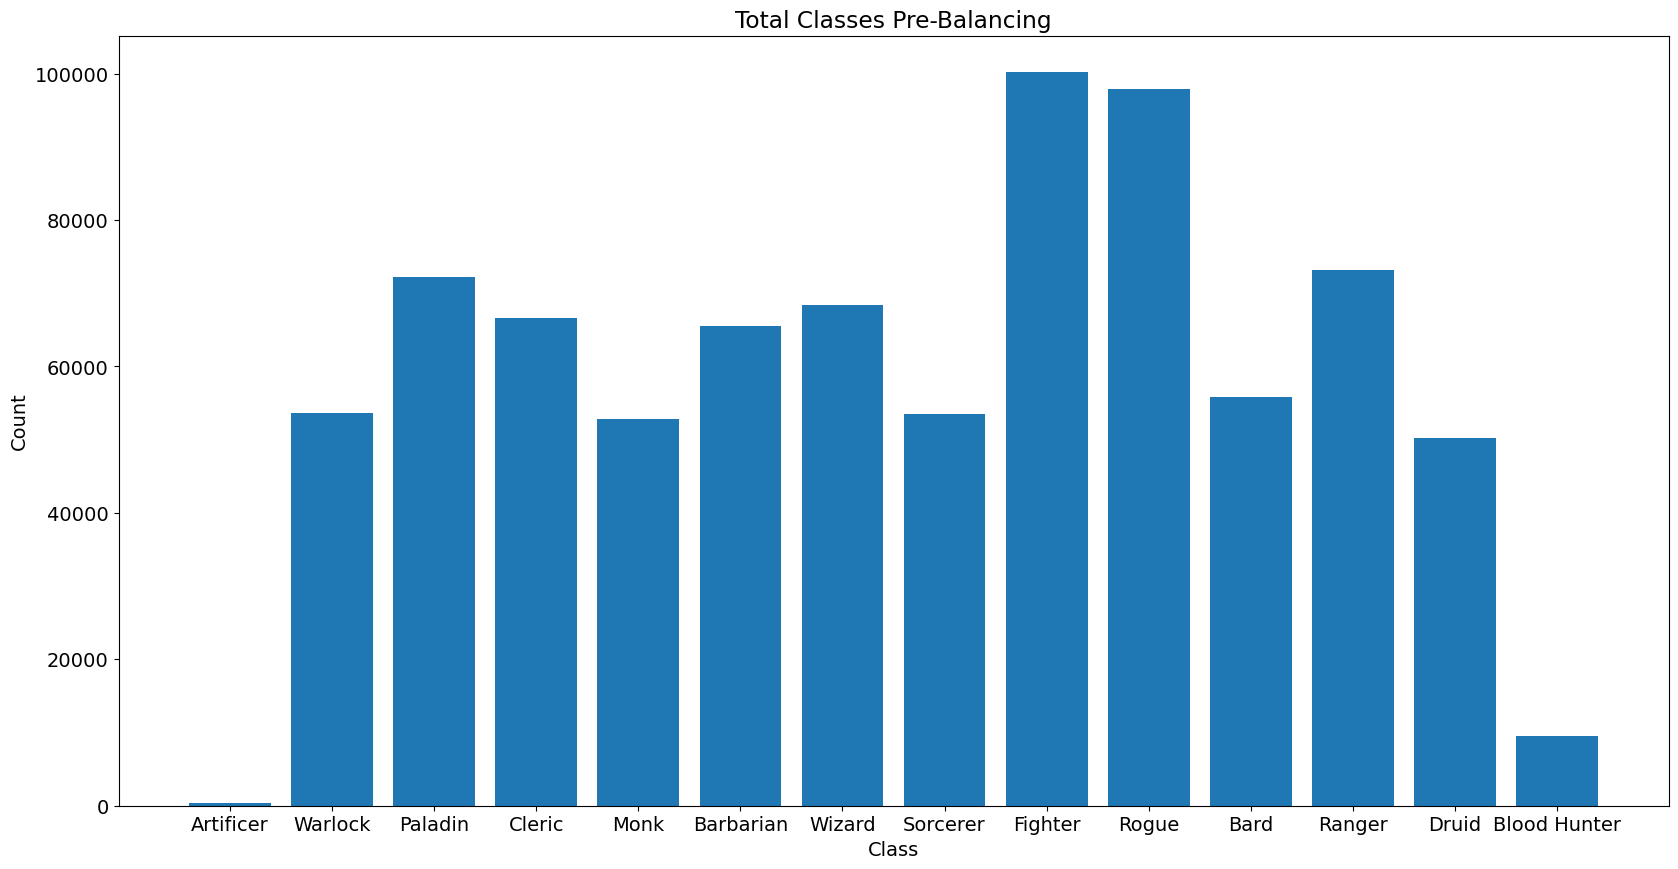

/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_77604/3124102017.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_77604/3124102017.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_77604/3124102017.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsized_stats = downsized_stats.append(sample)
/var/folders/wc/5_b6_bpj11z9f9893mv9x9900000gn/T/ipykernel_77604/3124102017.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

[Text(0.7586050134220214, 0.9827586206896551, 'Intelligence <= 0.949\ngini = 0.929\nsamples = 448000\nvalue = [31944, 32035, 31903, 31977, 32015, 32071, 31999, 31911\n32108, 31957, 31977, 31958, 31934, 32211]'),
 Text(0.5746978809183972, 0.9482758620689655, 'Charmisma <= 0.946\ngini = 0.921\nsamples = 363791\nvalue = [7095, 30994, 29612, 29632, 29657, 27897, 29991, 30519\n30659, 29658, 28042, 27119, 28001, 4915]'),
 Text(0.3869716926787515, 0.9137931034482759, 'Wisdom <= 0.946\ngini = 0.906\nsamples = 267251\nvalue = [5860, 29740, 5375, 27856, 27402, 26367, 28253, 29337\n20923, 28162, 23503, 5339, 5181, 3953]'),
 Text(0.2460122473148802, 0.8793103448275862, 'Dexterity <= 0.974\ngini = 0.89\nsamples = 191048\nvalue = [5094, 28824, 4367, 22762, 3668, 4097, 27253, 20594\n19401, 23291, 22003, 3768, 3473, 2453]'),
 Text(0.1468059475326058, 0.8448275862068966, 'Charmisma <= 0.862\ngini = 0.838\nsamples = 101966\nvalue = [2059, 25208, 1488, 13997, 2863, 2552, 21453, 3173\n18240, 3695, 1585, 2

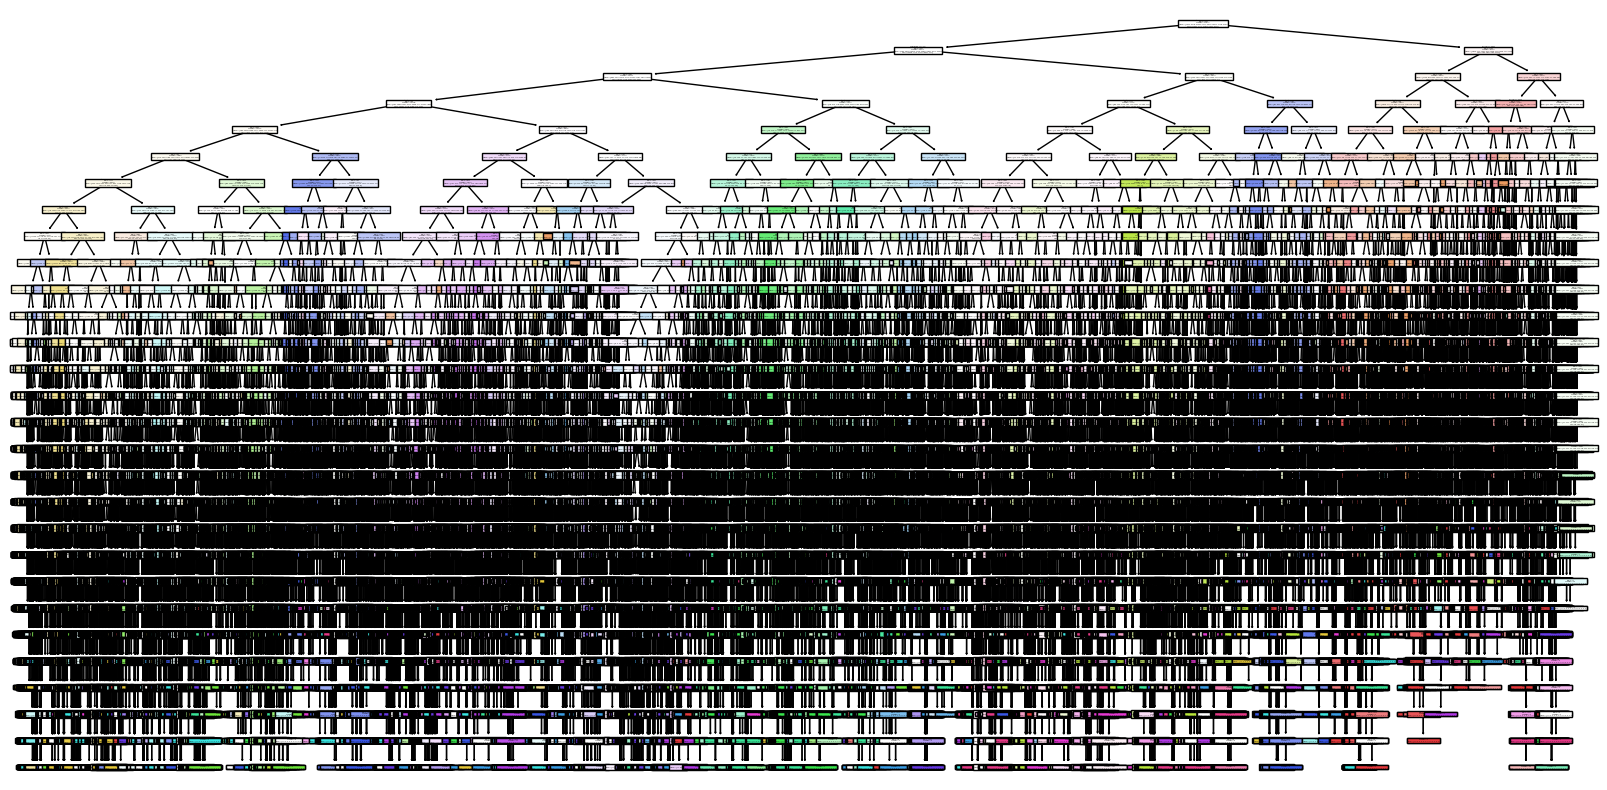

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 14

data = pd.read_csv("./data/proportionalData.csv")
classes = data["class_starting"].unique()
counts = []

for c in classes:
    counts.append(len(data[data["class_starting"] == c]))

fig1, ax1 = plt.subplots()
ax1.bar(classes, height=counts, label=data["class_starting"].unique())
ax1.set_title("Total Classes Pre-Balancing")
ax1.set_xlabel("Class")
ax1.set_ylabel("Count")

plt.show()

stats = ["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha"]
stats_names = ["Strength", "Dexterity", "Constitution", "Intelligence", "Wisdom", "Charmisma"]

downsized_stats = pd.DataFrame(columns=["s_str", "s_dex", "s_con", "s_int", "s_wis", "s_cha", "class_starting"])
for c in data["class_starting"].unique():
    sample = data[data["class_starting"] == c].sample(n=40000, random_state=2137, replace=True)
    downsized_stats = downsized_stats.append(sample)

X_train, X_test, y_train, y_test = train_test_split(np.array(downsized_stats[stats]), np.array(downsized_stats["class_starting"]), random_state=2137, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=28)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_predict)
y_predict = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_predict)

tree.plot_tree(clf,filled=True, feature_names=stats_names)